# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [30]:
# versus “%matplotlib inline” magic, which creates *non-interactive* figures in notebooks
%matplotlib notebook

In [31]:
import matplotlib as mpl
# Different backends allow matplotlib to work with different systems/environments (e.g. inside Jupyter, in interactive shell).
# https://matplotlib.org/faq/usage_faq.html#what-is-a-backend
mpl.get_backend()

'nbAgg'

### Artist Layer
* Top-level container for plot elements and functionalities
* Everything visible on a matplotlib figure is an artist instanc - title, axes, lines, labels etc.
* Comprised of one main object, `Artist`, that uses Renderer(part of backend) to draw on the canvas
* In a plot with multiple figures/axes, every subplot is assigned to an `Artist`
    * Artist layer is sometimes called *object-based plotting*
* See [here](https://www.aosabook.org/en/matplotlib.html) for details

In [32]:
# matplotlib scripting layer.
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


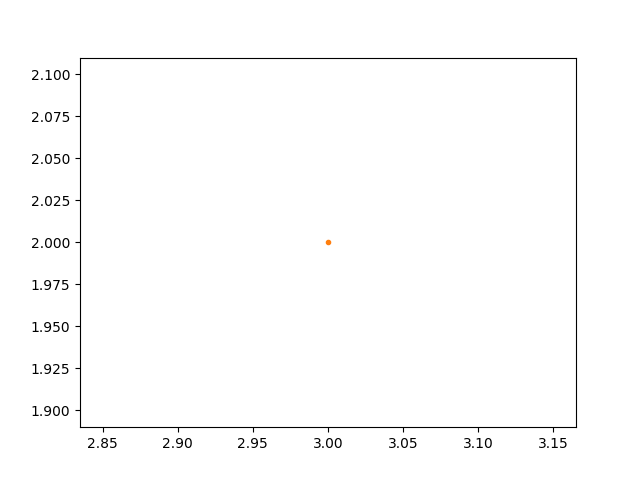

In [33]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [34]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

In [35]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
# "111" indicates only one subplot desired
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [36]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


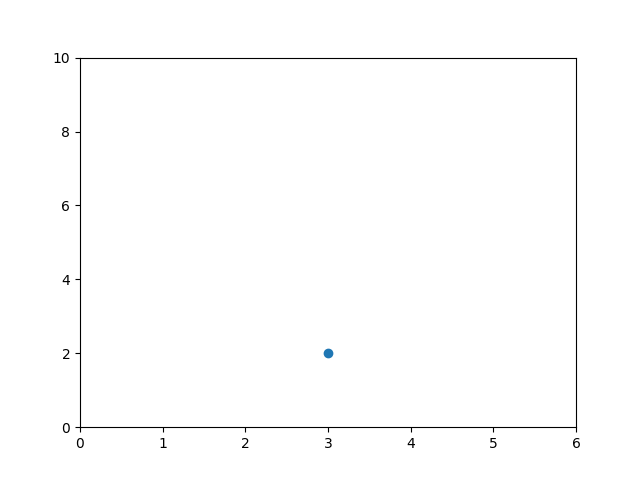

(0.0, 6.0, 0.0, 10.0)

In [37]:
# create a new figure (so figures from previous cells won't be updated)
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


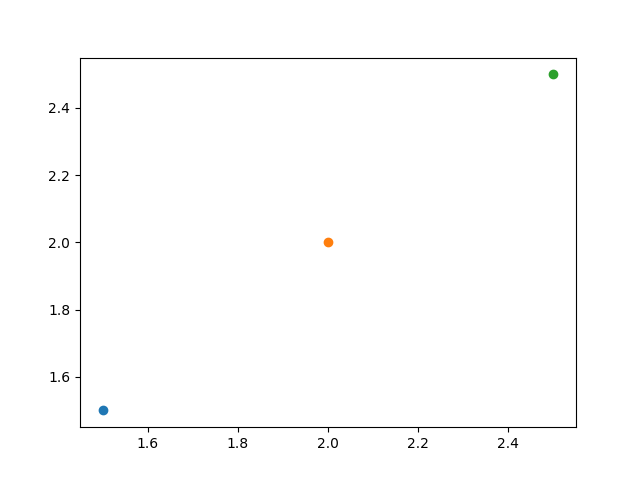

In [38]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

# script layer renders the three points above in different colors, as it recognizes them as different data series

In [39]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

### Notes on pyplot behaviors
* Use `gcf()` (GetCurrentFigure) to retrieve the currenct figure, and `gca()` (GetCurrentAxis) to retrieve the current axis.
    * pyplot keeps track of axis objects, but can be retrieved ad-hoc using aforementioned function calls
* pyplot *mirrors* the APIs of axis objects, so `pyplot.plot()` is actually translated into `axis.plot()` under the hood (as demonstrated above)
* Function declarations from most functions in matplot lib ends with an open set of kwargs, so there are many different ways to invoke a funfction.    

# Scatterplots

<IPython.core.display.Javascript object>


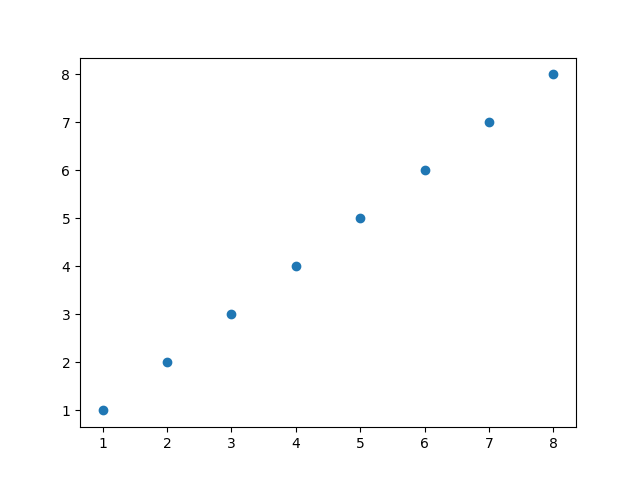

In [40]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


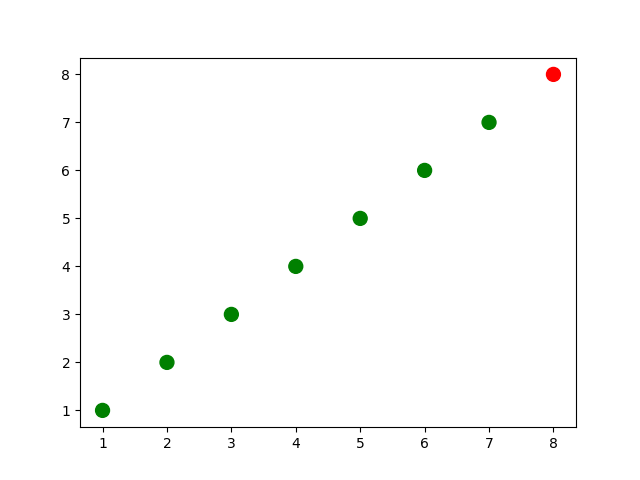

In [41]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
# Separation of data points into lists, which describes them as components, is a common pattern in matplotlib.
# The number of items are actually described as the *same slice across multiple data sources*
plt.scatter(x, y, s=100, c=colors)

In [42]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

# `zip` has lazy evaluation as it's a generator under the hood. Need to call `list` to see the output of
# iterating through result of `zip`
print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [43]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


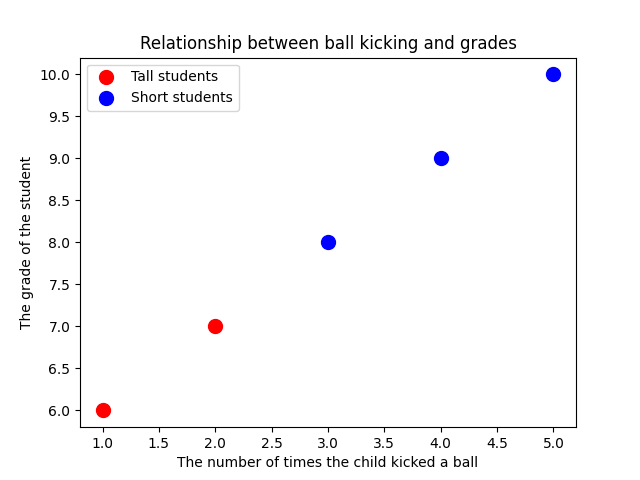

In [44]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [45]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

In [46]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [47]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [48]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5, 1.0, 'Relationship between ball kicking and grades'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [49]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [50]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [51]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


# Line Plots

<IPython.core.display.Javascript object>


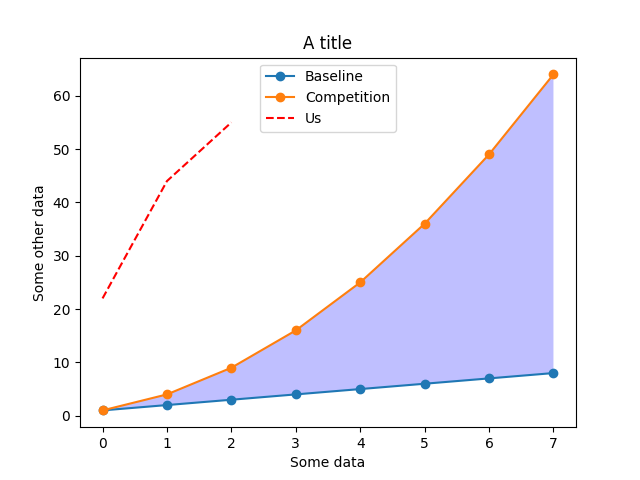

In [52]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
# notice that data are auto-identified as two separate series, no label required
plt.plot(linear_data, '-o', exponential_data, '-o')

In [53]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [54]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [55]:
# fill the area between the linear data and exponential data
# good for showing e.g. standard devs of results or error bars
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


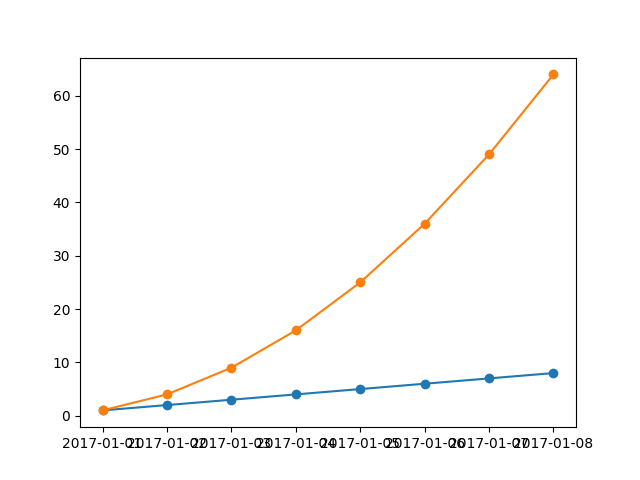

In [56]:
plt.figure()

# Does not produce desired effect, mainly because Numpy has a different datetime format than standard Python library,
# and matplotlib expects the latter.
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas

In [57]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
# to_datetime from pandas converts Numpy datetime to standard library datetime
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
# RuntimeError: matplotlib does not support generators as input
# Need to conver the iterator from map() to list before plotting
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

<IPython.core.display.Javascript object>


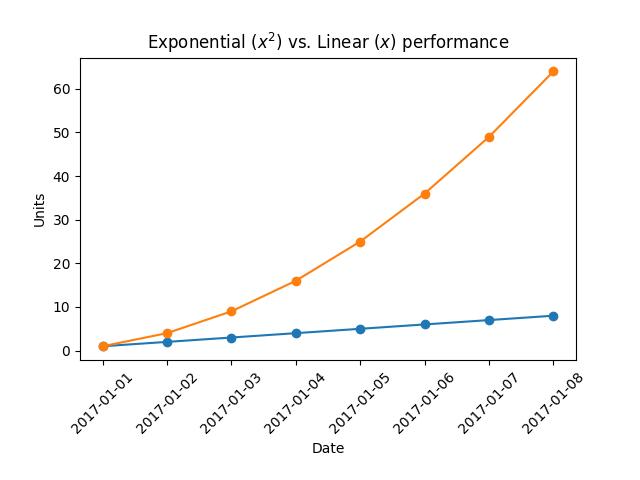

In [58]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
# convert the map to a list to get rid of the error
# fix issue above, but not memory-efficient
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [61]:
# Just like all artist, the x-axis here is an artist, and all its children are artist objects as well.
rec_gc(plt.gca().xaxis)

XAxis(80.0,120.0)
    Text(0.5, 38.16579644303843, '')
    Text(1, 39.554685331927324, '')
        Line2D((736330,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736330.0, 0, '2017-01-01')
        Text(736330.0, 1, '2017-01-01')
        Line2D((736331,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736331.0, 0, '2017-01-02')
        Text(736331.0, 1, '2017-01-02')
        Line2D((736332,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736332.0, 0, '2017-01-03')
        Text(736332.0, 1, '2017-01-03')
        Line2D((736333,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736333.0, 0, '2017-01-04')
        Text(736333.0, 1, '2017-01-04')
        Line2D((736334,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736334.0, 0, '2017-01-05')
        Text(736334.0, 1, '2017-01-05')
        Line2D((736335,0))
        Line2D()
        Line2D((0,0),(0,1))
        Text(736335.0, 0, '2017-01-06')
        Text(736335.0, 1, '2017-01-06

In [59]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
# each tick lable is a text object which itself is an artist
for item in x.get_ticklabels():
    item.set_rotation(45)

In [60]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [62]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5, 1.0, 'Exponential vs. Linear performance')

In [63]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

# Bar Charts

<IPython.core.display.Javascript object>


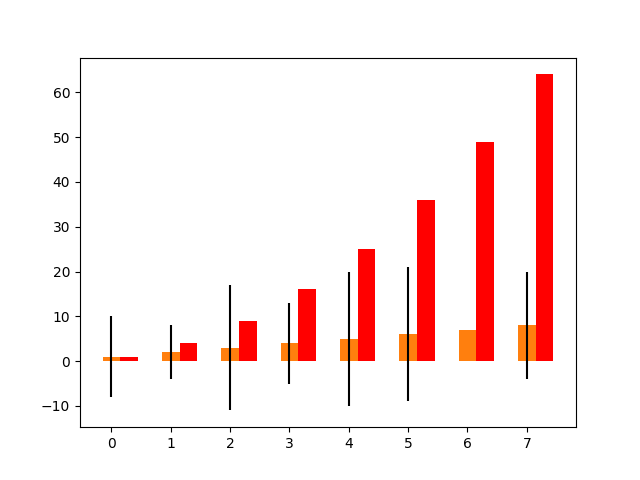

<BarContainer object of 8 artists>

In [64]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [65]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

# unfortunately, bar charts are not as well-supported in matplotlib as other figure types
# (note how x-labels do not auto-align above, along with other issues, making adding new data series painful)
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<BarContainer object of 8 artists>

In [66]:
# however, features like error bars are still very useful for bar charts
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


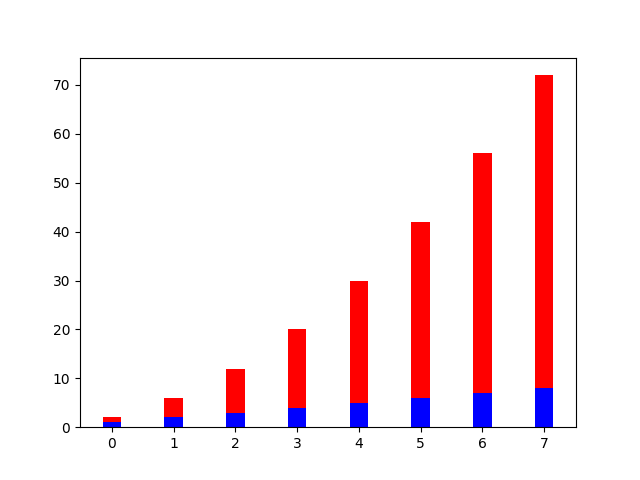

<BarContainer object of 8 artists>

In [67]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


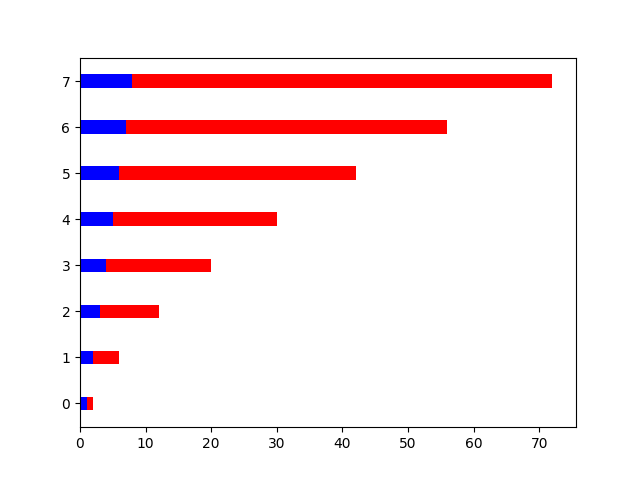

<BarContainer object of 8 artists>

In [68]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
# bottom -> left, width -> height when plotting horizontal bar chart
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

### Dejunkifying a plot
Walking through the process of applying Tufte's principles of data-ink ratio and chart junk to improve a matplotlib chart, produced using programming language popularity data from StackOverflow.

| Language   | % Popularity |
|------------|--------------|
| Python     | 56           |
| SQL        | 39           |
| Java       | 34           |
| C++        | 34           |
| Javascript | 29           |

<IPython.core.display.Javascript object>


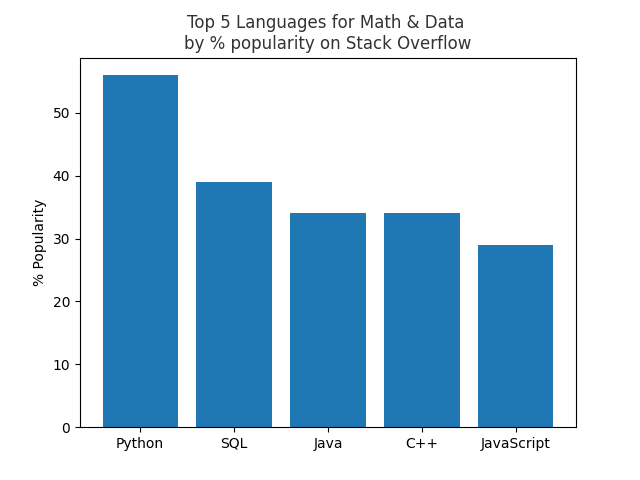

In [71]:
# first attempt
# tick along both axes and clutters the document
# y-axis labels should be direct readings
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.show()

<IPython.core.display.Javascript object>


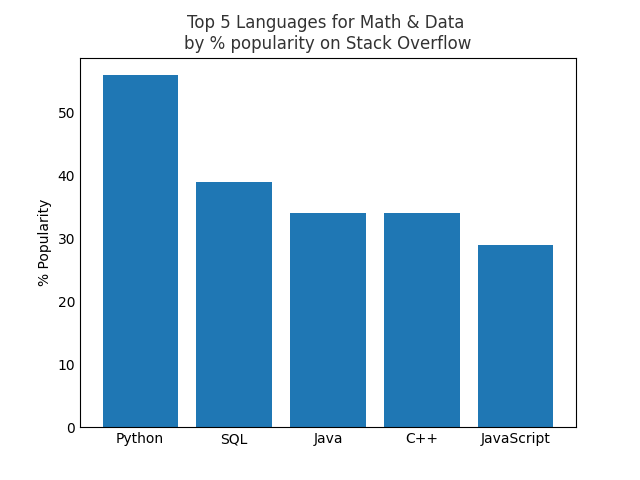

In [74]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Remove all the ticks (both axes), and tick labels on the Y axis
# Course material uses: plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# which does not work with newer versions of matplotlib
plt.tick_params(axis='both', which='both', length=0)
plt.show()

<IPython.core.display.Javascript object>


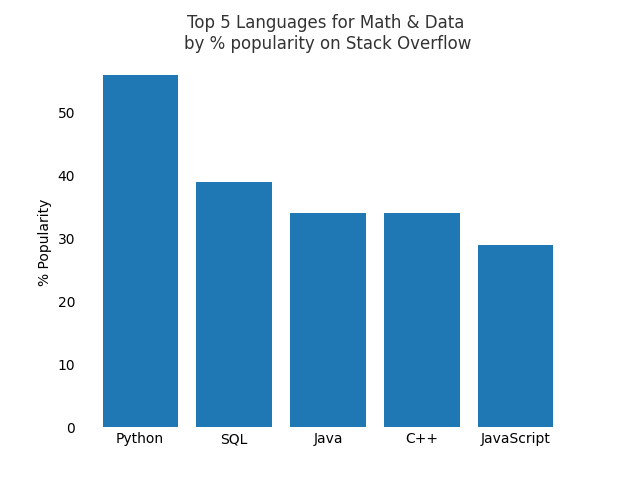

In [75]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', length=0)

# Remove chart frame
# Course material uses
# for spine in plt.gca().spines.values():
#    spine.set_visible(False)
plt.box(on=None)
plt.show()

<IPython.core.display.Javascript object>


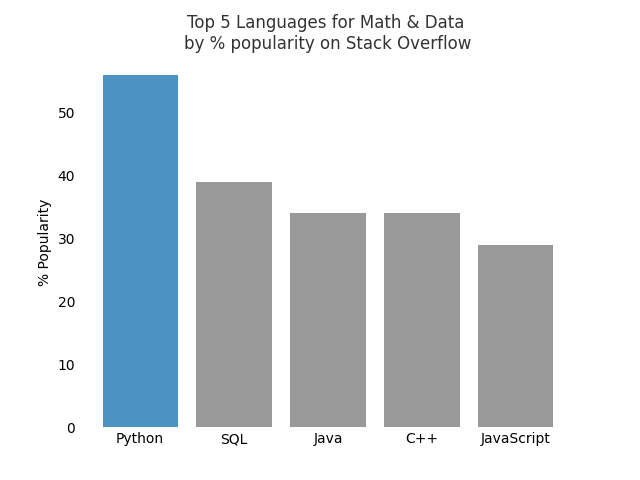

In [83]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# Change all except Python's bar color to gray, and soften colors
plt.bar(pos, popularity, align='center', color = ['#1F77B4', 'gray', 'gray', 'gray', 'gray'], alpha=0.8)
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', length=0)
# Remove chart frame
plt.box(on=None)

plt.show()

<IPython.core.display.Javascript object>


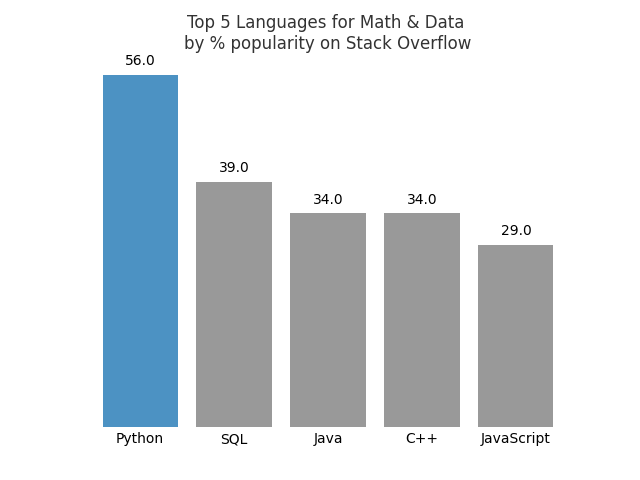

In [90]:
# From https://stackoverflow.com/a/48372659
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# Change all except Python's bar color to gray, and soften colors
plt.bar(pos, popularity, align='center', color = ['#1F77B4', 'gray', 'gray', 'gray', 'gray'], alpha=0.8)
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', length=0)
# Remove chart frame
plt.box(on=None)

# Remoe y-axis and label directly on each bar (since title already communicates all context for plotted values)
axes = plt.gca()
axes.get_yaxis().set_visible(False)
add_value_labels(axes)
plt.show()

<IPython.core.display.Javascript object>


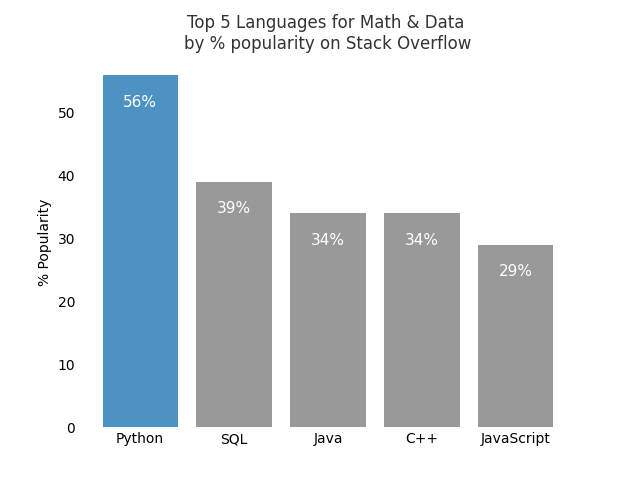

In [92]:
# Solution from course material. Resulting label will be inside each bar, centered towards the top
# direct label each bar with Y axis values
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# Change all except Python's bar color to gray, and soften colors
bars = plt.bar(pos, popularity, align='center', color = ['#1F77B4', 'gray', 'gray', 'gray', 'gray'], alpha=0.8)
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', length=0)
# Remove chart frame
plt.box(on=None)

# Remoe y-axis and label directly on each bar (since title already communicates all context for plotted values)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)